Exploration de la data

In [53]:
import pandas as pd
data= pd.read_excel('Merged_Bayard_Data.xlsx')
data.sample(5)

id_company  week_access  id_rulesAccess  id_doc  company_code  \
10945        4710           40             2.0  7742.0         101.0   
26814        4356           43             2.0  6868.0         104.0   
14531        3022           53             3.0  6289.0         101.0   
29253        3580           26             1.0  6774.0         101.0   
273          3900            9             2.0  6976.0         103.0   

       type_doc      type_interest  id_transation idTypeTransaction  \
10945   Invalid  Interest received         2131.0         Principal   
26814  Original            Invalid         2846.0         Fees paid   
14531  Original    Accued interest         1725.0              Cost   
29253   Invalid    Manual interest         1598.0         Fees paid   
273    Original    Manual interest         2982.0              Cost   

       company_name  interest_amount board_transaction time_access_from  \
10945  Company 4710      3203.685415          interest         22:00:00   
26814  Company 4356      5276.967413          interest         20:00:00   
14531  Company 3022      6288.933727              sell         15:00:00   
29253  Company 3580      1244.342674              sell         02:00:00   
273    Company 3900       615.306249               cap         01:00:00   

      time_access_t  
10945      04:00:00  
26814      23:00:00  
14531      04:00:00  
29253      11:00:00  
273        11:00:00

In [54]:
len(data)

30678

In [55]:
data.isnull().sum()

id_company              0
week_access             0
id_rulesAccess       3319
id_doc                  1
company_code         5334
type_doc                1
type_interest           1
id_transation           1
idTypeTransaction       1
company_name            1
interest_amount         1
board_transaction       1
time_access_from        0
time_access_t           0
dtype: int64

In [56]:
data= data.dropna()
len(data)

22486

In [57]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22486 entries, 1 to 30677
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id_company         22486 non-null  int64  
 1   week_access        22486 non-null  int64  
 2   id_rulesAccess     22486 non-null  float64
 3   id_doc             22486 non-null  float64
 4   company_code       22486 non-null  float64
 5   type_doc           22486 non-null  object 
 6   type_interest      22486 non-null  object 
 7   id_transation      22486 non-null  float64
 8   idTypeTransaction  22486 non-null  object 
 9   company_name       22486 non-null  object 
 10  interest_amount    22486 non-null  float64
 11  board_transaction  22486 non-null  object 
 12  time_access_from   22486 non-null  object 
 13  time_access_t      22486 non-null  object 
dtypes: float64(5), int64(2), object(7)
memory usage: 2.6+ MB


donc on a des fixation en format a faire: Pour ajuster le format des variables dans votre DataFrame, voici les modifications typiques que vous pourriez appliquer à chaque colonne en fonction des types de données attendus :

id_company et week_access : restent des entiers (int64), pas besoin de changement.
id_doc, id_transation, et interest_amount : ce sont des float64, mais si ces valeurs devraient être des entiers (par exemple, si vous n'avez pas besoin de décimales), vous pouvez les convertir en int.
type_doc, type_interest, idTypeTransaction, company_name, et board_transaction : restent en object, ce qui correspond à des chaînes de caractères.
time_access_from et time_access_t : si ces colonnes représentent des dates ou des heures, elles devraient être converties en format datetime.
Voici comment ajuster les formats dans le DataFrame data :

In [58]:
#ajustement des types de variables
import pandas as pd

# Conversion des colonnes en entiers (si besoin)
data['id_doc'] = data['id_doc'].astype('Int64')  # Int64 permet de gérer les valeurs manquantes (NaN)
data['id_transation'] = data['id_transation'].astype('Int64')
data['interest_amount'] = data['interest_amount'].astype('float64')  # Garde la valeur en float si nécessaire

# Conversion des colonnes 'time_access_from' et 'time_access_t' en format datetime(time_acess_to et  time_acess_from en format heures)
data['time_access_t']=pd.to_datetime(data['time_access_t']).dt.hour
data['time_access_from']=pd.to_datetime(data['time_access_from']).dt.hour
# Vérification des modifications
print(data.dtypes)
data.head()

id_company             int64
week_access            int64
id_rulesAccess       float64
id_doc                 Int64
company_code         float64
type_doc              object
type_interest         object
id_transation          Int64
idTypeTransaction     object
company_name          object
interest_amount      float64
board_transaction     object
time_access_from       int32
time_access_t          int32
dtype: object


C:\Users\pc\AppData\Local\Temp\ipykernel_22956\2472792762.py:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['time_access_t']=pd.to_datetime(data['time_access_t']).dt.hour
C:\Users\pc\AppData\Local\Temp\ipykernel_22956\2472792762.py:11: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['time_access_from']=pd.to_datetime(data['time_access_from']).dt.hour


id_company  week_access  id_rulesAccess  id_doc  company_code  type_doc  \
1        3001           39             2.0    5689         127.0  Original   
2        3002           11             3.0    5118         143.0      Copy   
3        3003            6             4.0    5184         132.0   Unknown   
4        3004           25             2.0    5424         129.0  Original   
5        3005           38             3.0    5587         193.0      Copy   

       type_interest  id_transation idTypeTransaction company_name  \
1  Interest received           1269         Principal    Company A   
2    Accued interest           1010          Discount    Company B   
3    Manual interest           1866              Cost    Company C   
4  Interest received           1077     Fees received    Company D   
5    Accued interest           1338         Fees paid    Company E   

   interest_amount board_transaction  time_access_from  time_access_t  
1      2557.577773               buy                 9             18  
2      2880.103647              sell                12             22  
3      1050.835659               cap                 5              8  
4      1803.174332          interest                20             16  
5      4266.958854               buy                15             14

In [59]:
#ajout de nouvelles colonnes(calculer access_duration entre time_acess_to et time_acess_from en format heures )
data['access_duration']=( 12-data['time_access_t'])+(12-data['time_access_from'])
data['access_duration'] = data['access_duration'].apply(lambda x: x if x > 0 else -x )
data.head()


id_company  week_access  id_rulesAccess  id_doc  company_code  type_doc  \
1        3001           39             2.0    5689         127.0  Original   
2        3002           11             3.0    5118         143.0      Copy   
3        3003            6             4.0    5184         132.0   Unknown   
4        3004           25             2.0    5424         129.0  Original   
5        3005           38             3.0    5587         193.0      Copy   

       type_interest  id_transation idTypeTransaction company_name  \
1  Interest received           1269         Principal    Company A   
2    Accued interest           1010          Discount    Company B   
3    Manual interest           1866              Cost    Company C   
4  Interest received           1077     Fees received    Company D   
5    Accued interest           1338         Fees paid    Company E   

   interest_amount board_transaction  time_access_from  time_access_t  \
1      2557.577773               buy                 9             18   
2      2880.103647              sell                12             22   
3      1050.835659               cap                 5              8   
4      1803.174332          interest                20             16   
5      4266.958854               buy                15             14   

   access_duration  
1                3  
2               10  
3               11  
4               12  
5                5

etude descriptive et graphique

In [60]:
data.describe()

id_company   week_access  id_rulesAccess       id_doc  company_code  \
count  22486.000000  22486.000000    22486.000000      22486.0  22486.000000   
mean    4022.168905     30.462732        1.994619  7019.529885    103.007649   
std      596.165417     17.219201        0.780413   565.391707      1.580297   
min     3001.000000      1.000000        1.000000       5118.0    101.000000   
25%     3513.000000     16.000000        1.000000       6521.0    102.000000   
50%     4096.000000     30.000000        2.000000       7028.0    103.000000   
75%     4555.000000     45.000000        3.000000       7482.0    104.000000   
max     4999.000000     59.000000        4.000000       7999.0    193.000000   

       id_transation  interest_amount  time_access_from  time_access_t  \
count        22486.0     22486.000000      22486.000000   22486.000000   
mean     2021.063729      3590.013230         11.943254      10.394245   
std       578.043831      1925.375543          7.859494       7.717747   
min           1000.0       505.909645          0.000000       0.000000   
25%          1522.25      1903.613647          4.000000       3.000000   
50%           2039.0      3503.621968         12.000000       9.000000   
75%           2515.0      5276.967413         20.000000      19.000000   
max           2995.0      6998.612362         23.000000      23.000000   

       access_duration  
count     22486.000000  
mean          8.990261  
std           6.582917  
min           0.000000  
25%           3.000000  
50%           8.000000  
75%          14.000000  
max          24.000000

D'après la description statistique des données que vous avez partagée, voici quelques points d'interprétation et des hypothèses que l'on peut formuler :ces.

### 2. **week_access**
   - **Interprétation** : Le champ `week_access` semble indiquer la semaine d'accès ou d'activité sur une plateforme, avec des valeurs allant de 1 à 59 (peut-être des semaines d'une année). La moyenne est autour de 30 semaines, ce qui peut indiquer une répartition équilibrée de l'activité sur une période moyenne.
   - **Hypothèse** : On pourrait supposer que certaines périodes de l'année (par exemple, autour de la semaine 30) sont plus actives que d'autres. Une analyse temporelle des accès pourrait montrer des pics saisonniers ou des périodes de forte dpé plus intense.

### 5. **interest_amount**
   - **Interprétation** : Le montant de l'intérêt (`interest_amount`) est très variable, allant de 501 à 6998 avec une moyenne d'environ 3607. L'écart-type est relativement élevé, ce qui suggère une grande dispersion des montants d'intérêt.
   - **Hypothèse** : Les entreprises avec des montants d'intérêt plus élevés pourraient représenter des transactions plus importantes ou des types d'activités spécifiques (par exemple, des investissements plus risqués ou plus rentables). Une analyse segmentée selon le montant de l'intérêt pourrait révéler des groupes d'entreprises distincts en termes de comportement financier.

### 6. **time_access_from** et **time_access_t**
   - **Interprétation** : Les colonnes `time_access_from` et `time_access_t` semblent représenter des heures d'accès, avec des valeurs comprises entre 0 et 23 heures. La moyenne est autour de 11h pour `time_access_from` et 10h pour `time_access_t`, ce qui pourrait indiquer des périodes d'accès matinales, avec une durée moyenne d'accès de 9 heures.
   - **Hypothèse** : On pourrait supposer que les entreprises ou les utilisateurs accèdent au système principalement le matin et utilisent la plateforme de manière continue pendant plusieurs heures. Il pourrait être utile d'analyser s'il y a des différences d'accès selon les secteurs d'activité ou selon les jours de la semaine.

### 7. **access_duration**
   - **Interprétation** : La durée d'accès (`access_duration`) varie entre 0 et 24 heures, avec une moyenne de 9 heures. Cela semble indiquer que la plupart des accès se font sur une demi-journée ou sur des périodes d'accès continues assez longues.
   - **Hypothèse** : Une hypothèse pourrait être que les accès plus longs correspondent à des périodes de traitement ou de surveillance intensive (par exemple, des journées où des décisions importantes sont prises ou des transactions critiques sont réalisées). Il serait intéressant de vérifier si certaines entreprises accèdent plus fréquemment et pour des périodes plus longues que d'autres.

### Conclusion et hypothèses principales à tester :
1. **Hypothèse temporelle** : Les accès aux documents et aux transactions suivent une certaine saisonnalité, avec des pics à certaines périodes de l'année ou de la semaine.
2. **Hypothèse financière** : Le montant de l'intérêt est lié au volume de transactions et peut révéler des segments d'entreprises avec des comtionnelle ou de type d'activité.

Ces hypothèses pourraient être validées par des analyses exploratoires supplémentaires, notamment des visualisations graphiques et des corrélations entre variables.

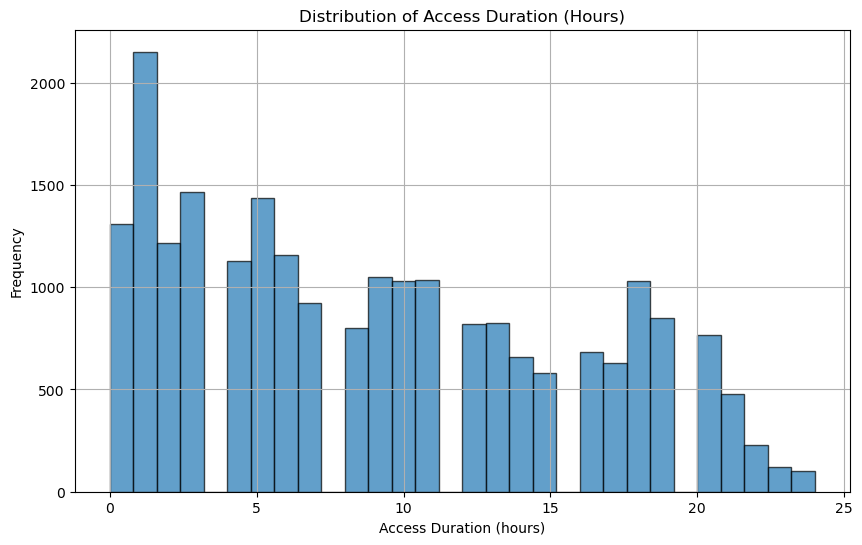

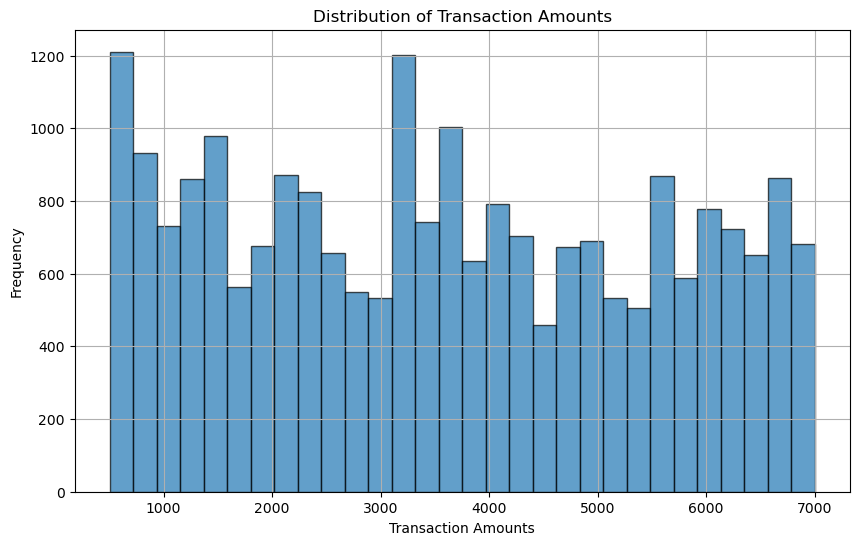

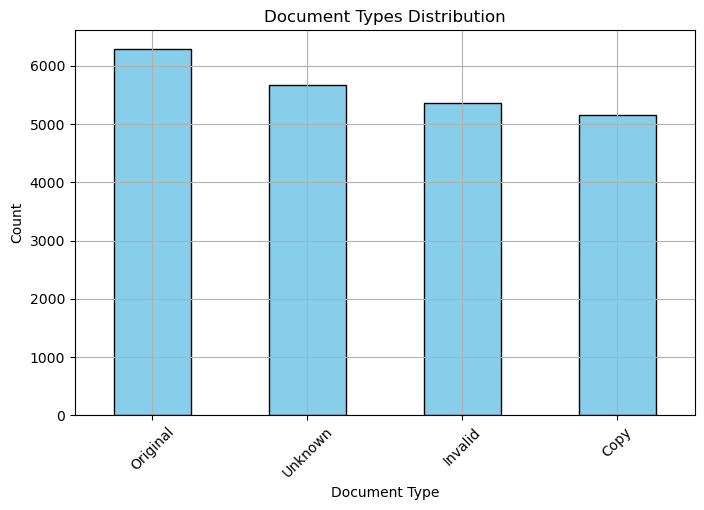

In [9]:
import matplotlib.pyplot as plt

# Visualization for Access Duration Distribution
plt.figure(figsize=(10, 6))
data['access_duration'].dropna().plot(kind='hist', bins=30, edgecolor='black', alpha=0.7)
plt.title('Distribution of Access Duration (Hours)')
plt.xlabel('Access Duration (hours)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Visualization for Transaction Amounts Distribution
plt.figure(figsize=(10, 6))
data['interest_amount'].dropna().plot(kind='hist', bins=30, edgecolor='black', alpha=0.7)
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Transaction Amounts')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Visualization for Document Types
plt.figure(figsize=(8, 5))
data['type_doc'].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Document Types Distribution')
plt.xlabel('Document Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


C:\Users\pc\AppData\Local\Temp\ipykernel_23944\2995814994.py:14: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


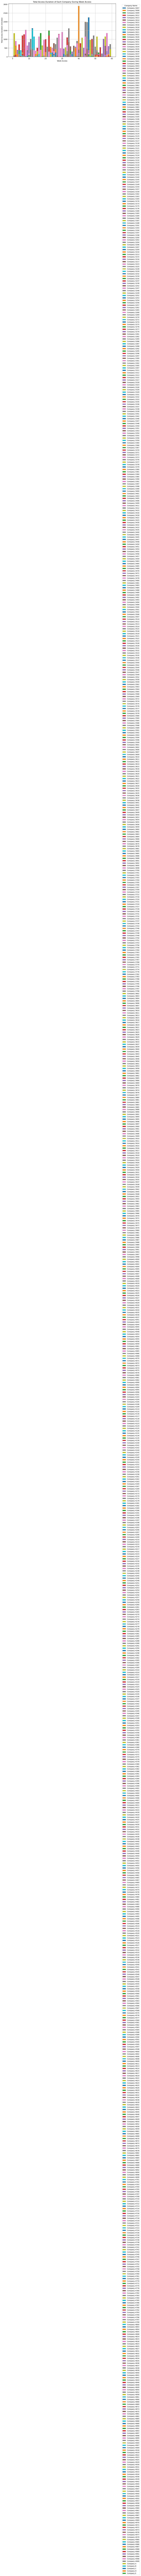

In [10]:
# Prepare data for the histogram: Total access duration for each company during the week_access
df_grouped = data.groupby(['company_name', 'week_access'])['access_duration'].sum().reset_index()

# Plot the histogram
plt.figure(figsize=(12, 6))
for company in df_grouped['company_name'].unique():
    subset = df_grouped[df_grouped['company_name'] == company]
    plt.bar(subset['week_access'], subset['access_duration'], label=company)
plt.title('Total Access Duration of Each Company During Week Access')
plt.xlabel('Week Access')
plt.ylabel('Total Access Duration (minutes)')
plt.legend(title='Company Name', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()



C:\Users\pc\AppData\Local\Temp\ipykernel_1768\1738032995.py:14: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


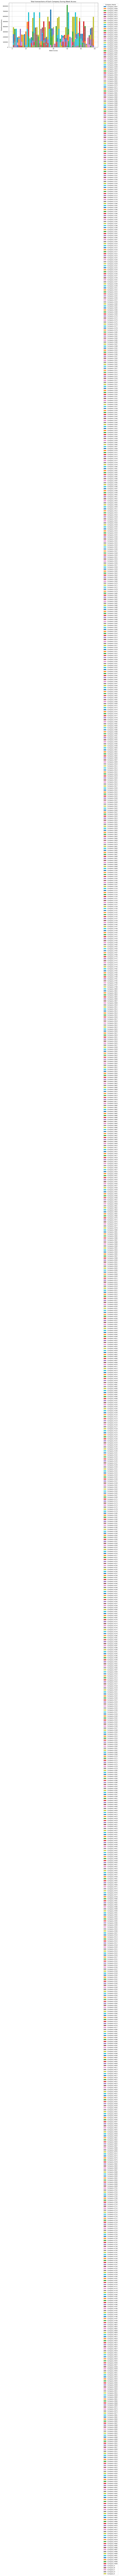

In [16]:
# Prepare data for the histogram: Total access duration for each company during the week_access
df_grouped = data.groupby(['company_name', 'week_access'])['interest_amount'].sum().reset_index()

# Plot the histogram
plt.figure(figsize=(12, 6))
for company in df_grouped['company_name'].unique():
    subset = df_grouped[df_grouped['company_name'] == company]
    plt.bar(subset['week_access'], subset['interest_amount'], label=company)
plt.title('Total transactions of Each Company During Week Access')
plt.xlabel('Week Access')
plt.ylabel('Totaltransactions')
plt.legend(title='Company Name', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


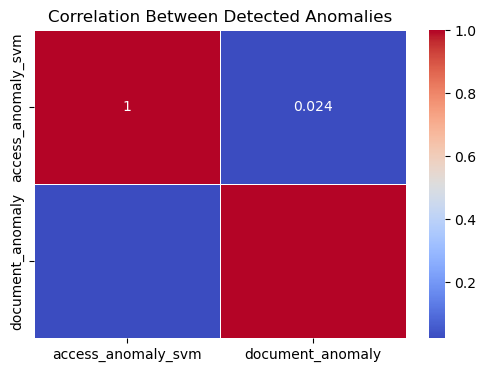

In [14]:
#correlation entre les anomalies 
# It seems I need to ensure that both anomaly columns exist in the data. Let's reload the data and recalculate anomalies if needed.

# Recalculate anomalies
data['access_anomaly_svm'] = data['access_duration'].apply(lambda x: 1 if x > 10 else 0)
data['document_anomaly'] = data['type_doc'].apply(lambda x: 1 if x == 'Unknown' or x == 'Invalid' else 0)

# Now calculate the correlation between anomalies
anomaly_data = data[['access_anomaly_svm', 'document_anomaly']].copy()
correlation_matrix = anomaly_data.corr()

# Plot the correlation matrix using a heatmap
import seaborn as sns
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Between Detected Anomalies')
plt.show()


y'a pas de correlation entre eux 

Construction du modele: 

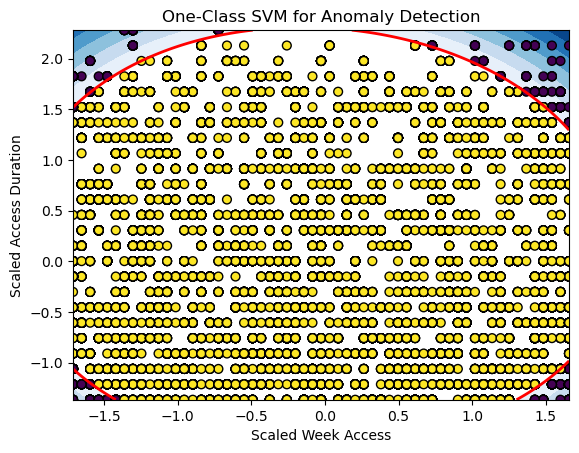

In [69]:
# accees duration par svm
from sklearn.svm import OneClassSVM
import numpy as np
import matplotlib.pyplot as plt

# Selecting the necessary features
X = data[['week_access', 'access_duration']].dropna()

# Scale the features for SVM
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Fit the One-Class SVM model
svm_model = OneClassSVM(kernel='rbf', gamma=0.1, nu=0.05)
svm_model.fit(X_scaled)

# Predict the anomalies
y_pred = svm_model.predict(X_scaled)

# Plotting the results and decision boundary
xx, yy = np.meshgrid(np.linspace(X_scaled[:, 0].min(), X_scaled[:, 0].max(), 500),
                     np.linspace(X_scaled[:, 1].min(), X_scaled[:, 1].max(), 500))

Z = svm_model.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.title("One-Class SVM for Anomaly Detection")
plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), 0, 7), cmap=plt.cm.Blues_r)
a = plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='red')
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_pred, s=40, edgecolors='k')
plt.xlabel('Scaled Week Access')
plt.ylabel('Scaled Access Duration')
plt.show()


In [11]:
!pip install tensorflow

C:\Users\pc\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


767/767 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
192/192 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


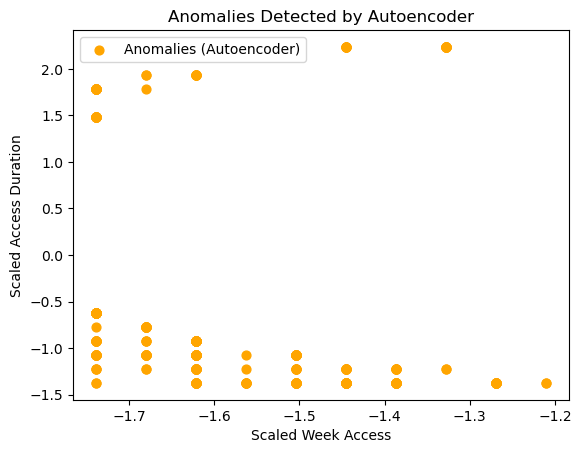

In [12]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
X = data[['week_access', 'access_duration']].dropna()
# Split data into training and testing sets for the Autoencoder
X_train, X_test = train_test_split(X_scaled, test_size=0.2, random_state=42)

# Build an Autoencoder model
autoencoder = Sequential()

# Encoder
autoencoder.add(Dense(16, activation='relu', input_shape=(X_train.shape[1],)))
autoencoder.add(Dense(8, activation='relu'))
autoencoder.add(Dense(4, activation='relu'))

# Decoder
autoencoder.add(Dense(8, activation='relu'))
autoencoder.add(Dense(16, activation='relu'))
autoencoder.add(Dense(X_train.shape[1], activation='sigmoid'))

# Compile the model
autoencoder.compile(optimizer='adam', loss='mse')

# Train the Autoencoder
history = autoencoder.fit(X_train, X_train, 
                          epochs=50, 
                          batch_size=32, 
                          validation_data=(X_test, X_test),
                          verbose=0)

# Use the trained Autoencoder to get the reconstruction errors
X_train_pred = autoencoder.predict(X_train)
X_test_pred = autoencoder.predict(X_test)

# Calculate the Mean Squared Error (MSE) for each instance in the test set
mse = np.mean(np.power(X_test - X_test_pred, 2), axis=1)

# Set a threshold for anomalies based on the reconstruction error
threshold = np.percentile(mse, 95)  # Considering top 5% as anomalies

# Detect anomalies based on the threshold
test_anomalies = mse > threshold

# Visualize anomalies
anomalies_autoencoder = X_test[test_anomalies]

# Plot the anomalies detected by Autoencoder
plt.title("Anomalies Detected by Autoencoder")
plt.scatter(anomalies_autoencoder[:, 0], anomalies_autoencoder[:, 1], c='orange', s=40, label='Anomalies (Autoencoder)')
plt.xlabel('Scaled Week Access')
plt.ylabel('Scaled Access Duration')
plt.legend()
plt.show()


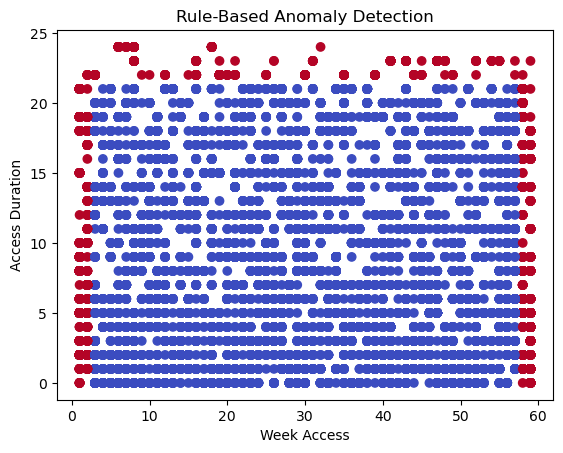

In [20]:
 # Define statistical thresholds for 'access_duration'
lower_bound_duration = data['access_duration'].quantile(0.05)  # 5th percentile
upper_bound_duration = data['access_duration'].quantile(0.95)  # 95th percentile

# Define thresholds for week access (e.g., unusually high or low weeks)
lower_bound_week = data['week_access'].quantile(0.05)
upper_bound_week = data['week_access'].quantile(0.95)

# Rule-based detection: Flag anomalies if they are outside these bounds
data['rule_based_anomaly'] = (
    (data['access_duration'] < lower_bound_duration) | 
    (data['access_duration'] > upper_bound_duration) |
    (data['week_access'] < lower_bound_week) |
    (data['week_access'] > upper_bound_week)
).astype(int)  # 1 for anomaly, 0 for normal

# Count the anomalies detected by rule-based detection
anomalies_rule_based = data[data['rule_based_anomaly'] == 1]
# Plot the anomalies based on rule-based detection
plt.title("Rule-Based Anomaly Detection")
plt.scatter(data['week_access'], data['access_duration'], c=data['rule_based_anomaly'], cmap='coolwarm', label='Anomalies')
plt.xlabel('Week Access')
plt.ylabel('Access Duration')
plt.show()


In [37]:
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import regularizers
import numpy as np

# Preparing data for the autoencoder
access_duration_data = data[['access_duration']].dropna()
scaler = StandardScaler()
scaled_access_duration = scaler.fit_transform(access_duration_data)

# Building the autoencoder model
input_dim = scaled_access_duration.shape[1]
encoding_dim = 1  # Compression to a single feature

autoencoder_access = Sequential([
    Dense(encoding_dim, activation="relu", activity_regularizer=regularizers.l1(10e-5), input_shape=(input_dim,)),
    Dense(input_dim, activation='linear')
])

autoencoder_access.compile(optimizer='adam', loss='mse')

# Training the autoencoder
history_access = autoencoder_access.fit(
    scaled_access_duration, scaled_access_duration,
    epochs=50,
    batch_size=32,
    shuffle=True,
    validation_split=0.2,
    verbose=0
)

# Predicting and calculating reconstruction error
reconstructed_access = autoencoder_access.predict(scaled_access_duration)
mse_access = np.mean(np.power(scaled_access_duration - reconstructed_access, 2), axis=1)

# Setting a threshold for anomaly detection
threshold_access = np.percentile(mse_access, 95)  # 95th percentile as the threshold for anomalies

# Marking anomalies
data['access_anomaly'] = 1
data.loc[access_duration_data.index, 'access_anomaly'] = mse_access> threshold_access
data['alert_type'] = 'access anomaly'
data['status'] = 'Not Yet'
data['detection_date'] = pd.to_datetime('today').date()

# Displaying the first few rows with the access anomaly detection results
data[['id_company', 'access_anomaly','alert_type','status','detection_date']].head(5)


C:\Users\pc\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


959/959 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


C:\Users\pc\AppData\Local\Temp\ipykernel_23388\358616534.py:42: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[False False False ... False False False]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[access_duration_data.index, 'access_anomaly'] = mse_access> threshold_access


id_company access_anomaly      alert_type   status detection_date
1        3001          False  access anomaly  Not Yet     2024-10-26
2        3002          False  access anomaly  Not Yet     2024-10-26
3        3003          False  access anomaly  Not Yet     2024-10-26
4        3004          False  access anomaly  Not Yet     2024-10-26
5        3005          False  access anomaly  Not Yet     2024-10-26

In [66]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense

# Prepare the input data for the autoencoder
X_train = data['interest_amount'].values.reshape(-1, 1)

# Define the autoencoder architecture
input_dim = X_train.shape[1]
encoding_dim = 1  # smaller dimension for compression

# Encoder
input_layer = Input(shape=(input_dim,))
encoded = Dense(encoding_dim, activation='relu')(input_layer)

# Decoder
decoded = Dense(input_dim, activation='linear')(encoded)

# Autoencoder model
autoencoder = Model(inputs=input_layer, outputs=decoded)
autoencoder.compile(optimizer='adam', loss='mse')

# Train the autoencoder
history = autoencoder.fit(X_train, X_train, epochs=50, batch_size=32, shuffle=True, validation_split=0.1, verbose=0)

# Use the autoencoder to predict and calculate reconstruction error
X_pred = autoencoder.predict(X_train)
mse = np.mean(np.power(X_train - X_pred, 2), axis=1)

# Add the reconstruction error to the data for analysis
data['reconstruction_error'] = mse
data['alert_type'] = 'transaction anomaly'
data['status'] = 'Not Yet'
data['detection_date'] = pd.to_datetime('today').date()

# Display the data with reconstruction error to analyze anomalies
data[['id_company','id_transation', 'alert_type','status','interest_amount', 'reconstruction_error','detection_date']].head()


703/703 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


id_company  id_transation           alert_type   status  interest_amount  \
1        3001           1269  transaction anomaly  Not Yet      2557.577773   
2        3002           1010  transaction anomaly  Not Yet      2880.103647   
3        3003           1866  transaction anomaly  Not Yet      1050.835659   
4        3004           1077  transaction anomaly  Not Yet      1803.174332   
5        3005           1338  transaction anomaly  Not Yet      4266.958854   

   reconstruction_error detection_date  
1          6.381077e+06     2024-10-28  
2          8.114552e+06     2024-10-28  
3          1.039049e+06     2024-10-28  
4          3.138836e+06     2024-10-28  
5          1.793913e+07     2024-10-28

transaction anomalies

Pour détecter les anomalies dans les transactions, notamment les transactions inhabituelles ou avec un montant élevé, nous pouvons nous concentrer sur la colonne interest_amount, qui représente le montant d'intérêt d'une transaction. Un modèle de détection d'anomalies basé sur des statistiques ou des méthodes d'apprentissage non supervisées, comme le One-Class SVM ou Isolation Forest, serait approprié ici.

Je vais mettre en œuvre le modèle Isolation Forest pour détecter les anomalies de montant élevé dans interest_amount et évaluer sa performance.

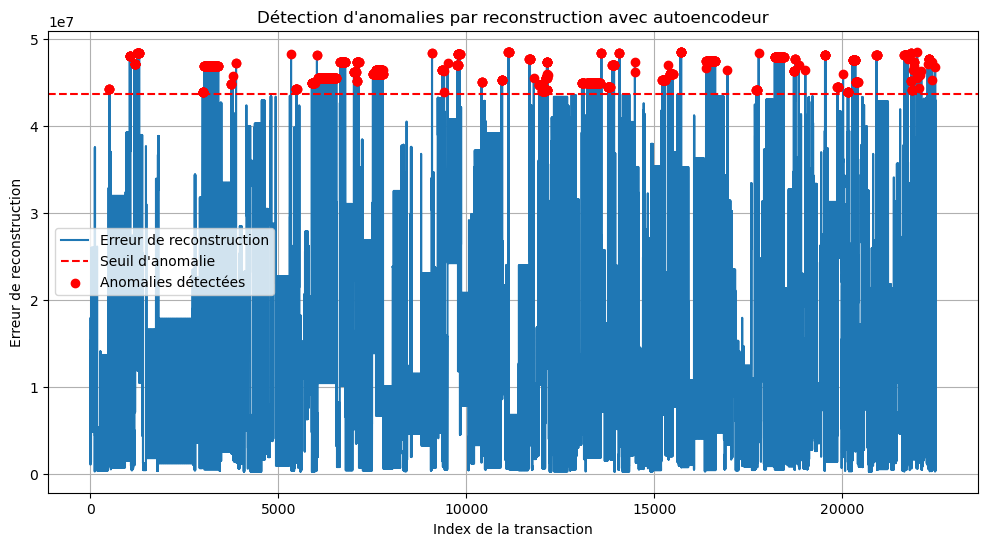

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Simuler des données pour l'exemple
np.random.seed(42)
data = pd.DataFrame({
    'id_company': np.arange(1, len(X_train) + 1),
    'id_transaction': np.arange(1, len(X_train) + 1),
    'interest_amount': X_train.flatten()
})

# Ajouter l'erreur de reconstruction calculée précédemment
data['reconstruction_error'] = mse

# Définir un seuil d'anomalie pour l'erreur de reconstruction
threshold = data['reconstruction_error'].quantile(0.95)

# Identifier les anomalies
data['is_anomaly'] = data['reconstruction_error'] > threshold

# Visualisation des résultats
plt.figure(figsize=(12, 6))

# Tracer les erreurs de reconstruction
plt.plot(data.index, data['reconstruction_error'], label='Erreur de reconstruction')
plt.axhline(y=threshold, color='r', linestyle='--', label='Seuil d\'anomalie')

# Mettre en évidence les anomalies
anomalies = data[data['is_anomaly']]
plt.scatter(anomalies.index, anomalies['reconstruction_error'], color='red', label='Anomalies détectées', zorder=5)

# Ajouter des détails au graphique
plt.xlabel('Index de la transaction')
plt.ylabel('Erreur de reconstruction')
plt.title('Détection d\'anomalies par reconstruction avec autoencodeur')
plt.legend()
plt.grid(True)
plt.show()


In [70]:
# Implementation of each model separately for comparison

# 1. SVM Model for Anomaly Detection
svm_model = OneClassSVM(kernel='rbf', gamma=0.1, nu=0.05)
svm_model.fit(X_scaled)
data['svm_anomaly'] = svm_model.predict(X_scaled)
data['svm_anomaly'] = data['svm_anomaly'].apply(lambda x: 1 if x == -1 else 0)

# Display SVM anomalies
svm_anomalies = data[data['svm_anomaly'] == 1]


# Evaluation for SVM Model
svm_anomaly_count = data['svm_anomaly'].sum()
svm_anomaly_ratio = svm_anomaly_count / len(data)




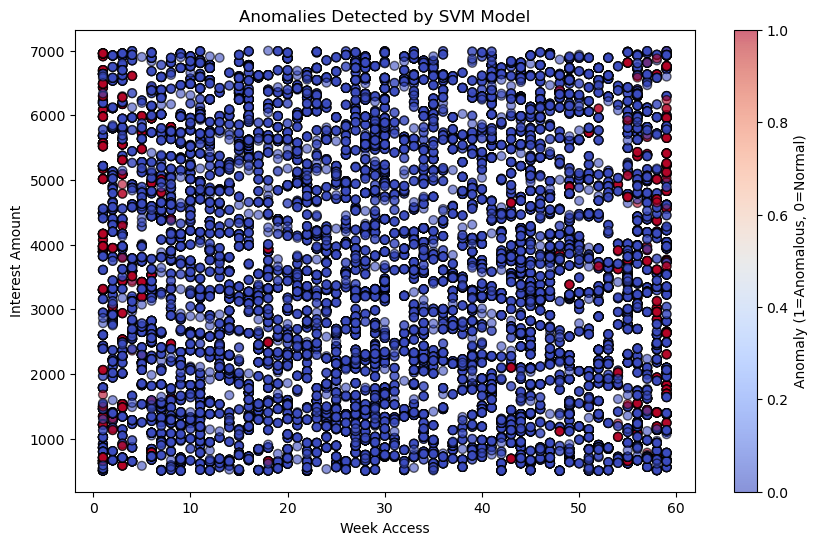

In [71]:
# 1. Visualization for SVM model
plt.figure(figsize=(10, 6))
plt.scatter(data['week_access'], data['interest_amount'], 
            c=data['svm_anomaly'], cmap='coolwarm', edgecolor='k', s=40, alpha=0.6)
plt.title("Anomalies Detected by SVM Model")
plt.xlabel("Week Access")
plt.ylabel("Interest Amount")
plt.colorbar(label='Anomaly (1=Anomalous, 0=Normal)')
plt.show()

In [72]:
# 2. Rule-Based Model for Anomaly Detection
lower_bound_duration = data['interest_amount'].quantile(0.05)
upper_bound_duration = data['interest_amount'].quantile(0.95)
lower_bound_week = data['week_access'].quantile(0.05)
upper_bound_week = data['week_access'].quantile(0.95)

data['rule_based_anomaly'] = (
    (data['interest_amount'] < lower_bound_duration) |
    (data['interest_amount'] > upper_bound_duration) |
    (data['week_access'] < lower_bound_week) |
    (data['week_access'] > upper_bound_week)
).astype(int)
# Display Rule-Based anomalies
rule_based_anomalies = data[data['rule_based_anomaly'] == 1]

# Evaluation for Rule-Based Model
rule_based_anomaly_count = data['rule_based_anomaly'].sum()
rule_based_anomaly_ratio = rule_based_anomaly_count / len(data)




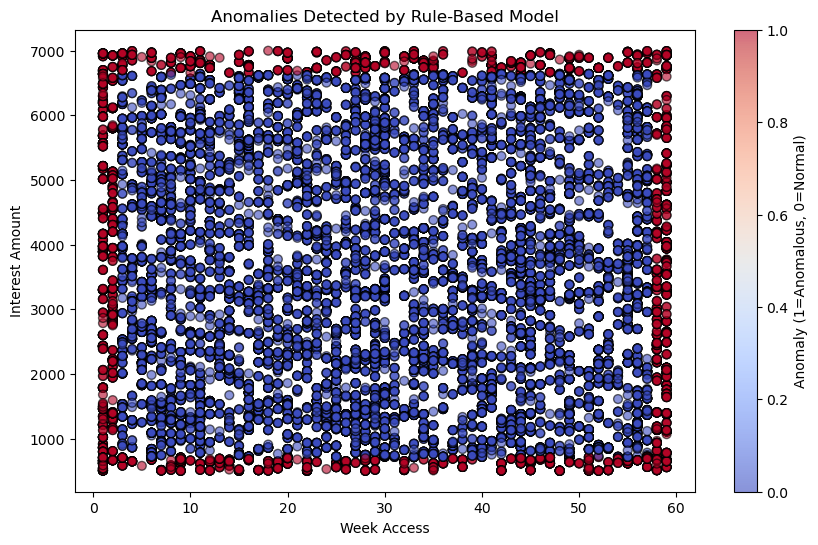

In [73]:
# 2. Visualization for Rule-Based model
plt.figure(figsize=(10, 6))
plt.scatter(data['week_access'], data['interest_amount'], 
            c=data['rule_based_anomaly'], cmap='coolwarm', edgecolor='k', s=40, alpha=0.6)
plt.title("Anomalies Detected by Rule-Based Model")
plt.xlabel("Week Access")
plt.ylabel("Interest Amount")
plt.colorbar(label='Anomaly (1=Anomalous, 0=Normal)')
plt.show()

In [74]:
# Results Summary for Comparison
svm_results = {
    "Method": "SVM",
    "Anomaly Count": svm_anomaly_count,
    "Total Count": len(data),
    "Anomaly Ratio": svm_anomaly_ratio
}

rule_based_results = {
    "Method": "Rule-Based",
    "Anomaly Count": rule_based_anomaly_count,
    "Total Count": len(data),
    "Anomaly Ratio": rule_based_anomaly_ratio
}

comparison_df = pd.DataFrame([svm_results, rule_based_results])
lstm_anomaly_count = data_filtered['lstm_anomaly'].sum()
lstm_anomaly_count

comparison_df

Method  Anomaly Count  Total Count  Anomaly Ratio
0         SVM           1188        22486       0.052833
1  Rule-Based           3879        22486       0.172507

Les visualisations montrent les anomalies détectées par chaque modèle :

SVM : Les anomalies sont principalement concentrées dans certaines plages élevées de interest_amount, indiquant que le modèle détecte des valeurs extrêmes dans cette dimension.

Rule-Based : Ce modèle capture plus d'anomalies réparties dans les limites supérieures et inférieures des distributions de week_access et interest_amount, ce qui explique le nombre plus élevé d'anomalies par rapport au modèle SVM.

anomalie pour les document

In [56]:
from sklearn.preprocessing import LabelEncoder

# Re-encoding the target column `type_doc` to ensure compatibility with ML algorithms
# This will convert 'Original', 'Copy', 'Invalid', etc. into integer values.
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(data['type_doc'])

# Verifying the encoding to ensure 'Original', 'Copy', etc., are converted to integers
label_mapping = dict(zip(label_encoder.classes_, range(len(label_encoder.classes_))))
y_encoded[:5], label_mapping


(array([2, 0, 3, 2, 0]),
 {'Copy': 0, 'Invalid': 1, 'Original': 2, 'Unknown': 3})

In [57]:
# Re-importing necessary modules for deep learning
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import to_categorical
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report


# Converting target variable to categorical for neural network model
y_nn = to_categorical(y_encoded)

# Splitting the data
X_train_nn, X_test_nn, y_train_nn, y_test_nn = train_test_split(X, y_nn, test_size=0.2, random_state=42)

# Standardizing the features
scaler_nn = StandardScaler()
X_train_nn = scaler_nn.fit_transform(X_train_nn)
X_test_nn = scaler_nn.transform(X_test_nn)

# Building the neural network model
nn_model = Sequential()
nn_model.add(Dense(64, activation='relu', input_shape=(X_train_nn.shape[1],)))
nn_model.add(Dropout(0.3))
nn_model.add(Dense(32, activation='relu'))
nn_model.add(Dropout(0.3))
nn_model.add(Dense(16, activation='relu'))
nn_model.add(Dense(y_nn.shape[1], activation='softmax'))  # Output layer for multi-class classification

# Compiling the model
nn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Training the model
history = nn_model.fit(X_train_nn, y_train_nn, epochs=50, batch_size=32, validation_data=(X_test_nn, y_test_nn), verbose=0)

# Evaluating the neural network model
loss, accuracy_nn = nn_model.evaluate(X_test_nn, y_test_nn, verbose=0)

# Predicting and calculating classification report for NN model
y_pred_nn = nn_model.predict(X_test_nn)
y_pred_nn_classes = y_pred_nn.argmax(axis=1)
y_test_nn_classes = y_test_nn.argmax(axis=1)
classification_rep_nn = classification_report(y_test_nn_classes, y_pred_nn_classes, target_names=label_encoder.classes_)

print(accuracy_nn)



NameError: name 'X' is not defined

In [59]:
# Define `true_label` based on `type_doc`
data['true_label'] = data['type_doc'].apply(lambda x: 1 if x in ['Unknown', 'Invalid'] else 0)


In [61]:
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
import numpy as np

# Step 1: Filter the data for valid document types (Original and Copy) for training
valid_data = data[data['type_doc'].isin(['Original', 'Copy'])][['id_rulesAccess', 'company_code', 'interest_amount']].fillna(0)

# Standardize the features
scaler = StandardScaler()
valid_data_scaled = scaler.fit_transform(valid_data)

# Step 2: Define the Autoencoder model
input_dim = valid_data_scaled.shape[1]
input_layer = Input(shape=(input_dim,))
encoder = Dense(64, activation="relu")(input_layer)
encoder = Dense(32, activation="relu")(encoder)
encoder = Dense(16, activation="relu")(encoder)
decoder = Dense(32, activation="relu")(encoder)
decoder = Dense(64, activation="relu")(decoder)
decoder = Dense(input_dim, activation="linear")(decoder)

autoencoder = Model(inputs=input_layer, outputs=decoder)
autoencoder.compile(optimizer='adam', loss='mse')

# Train the Autoencoder
history = autoencoder.fit(valid_data_scaled, valid_data_scaled, 
                          epochs=50, 
                          batch_size=32, 
                          validation_split=0.2, 
                          verbose=1)

# Step 3: Calculate reconstruction error for all documents and detect anomalies
all_data = data[['id_rulesAccess', 'company_code', 'interest_amount']].fillna(0)
all_data_scaled = scaler.transform(all_data)
reconstructions = autoencoder.predict(all_data_scaled)
mse = np.mean(np.power(all_data_scaled - reconstructions, 2), axis=1)

# Set threshold based on the training reconstruction errors
threshold = np.mean(mse) + 3 * np.std(mse)

# Flag anomalies based on the threshold and document type
data['anomaly_detected'] = (mse > threshold) & data['type_doc'].isin(['Unknown', 'Invalid'])
data['anomaly_detected'] = data['anomaly_detected'].astype(int)  # Convert to binary (0 or 1)

# Step 4: Display a sample of the results with id_company, id_doc, type_doc, and anomaly_detected columns
result_df = data[['id_company', 'id_doc', 'type_doc', 'anomaly_detected']]
result_df.head()


Epoch 1/50
287/287 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.4600 - val_loss: 0.0012
Epoch 2/50
287/287 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0010 - val_loss: 0.0013
Epoch 3/50
287/287 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0031 - val_loss: 9.7699e-04
Epoch 4/50
287/287 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0163 - val_loss: 3.8287e-04
Epoch 5/50
287/287 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0012 - val_loss: 2.6897e-04
Epoch 6/50
287/287 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0072 - val_loss: 4.3573e-04
Epoch 7/50
287/287 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0015 - val_loss: 0.0014
Epoch 8/50
287/287 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0783 - val_loss: 0.0040
Epoch 9/50
287/287 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0099 - val_loss: 5.4742e-04
Epoch 10/50
287/287 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 6.6282e-04 - val_loss: 3.5165e-04
Epoch 11/50
287/287 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 5.4354e-04 - val_loss: 7.2246e-04
Epoch 12/50
287/

id_company  id_doc  type_doc  anomaly_detected
0        3001    5689  Original                 0
1        3002    5118      Copy                 0
2        3003    5184   Unknown                 1
3        3004    5424  Original                 0
4        3005    5587      Copy                 0

Epoch 1/50
287/287 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - loss: 0.5650 - val_loss: 0.0099
Epoch 2/50
287/287 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0281 - val_loss: 0.0039
Epoch 3/50
287/287 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0044 - val_loss: 5.7528e-04
Epoch 4/50
287/287 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0060 - val_loss: 3.7004e-04
Epoch 5/50
287/287 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 6.0878e-04 - val_loss: 2.7203e-04
Epoch 6/50
287/287 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 2.8821e-04 - val_loss: 2.0790e-04
Epoch 7/50
287/287 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0043 - val_loss: 1.7992e-04
Epoch 8/50
287/287 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 2.0422e-04 - val_loss: 3.1072e-04
Epoch 9/50
287/287 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 3.2029e-04 - val_loss: 4.5314e-04
Epoch 10/50
287/287 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0016 - val_loss: 1.3738e-04
Epoch 11/50
287/287 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 1.6260e-04 - val_loss: 3.0651e

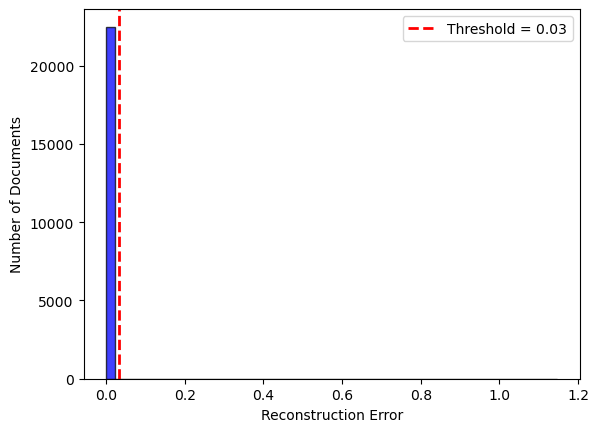

In [67]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

# Data Preparation (assuming data is already loaded as `data`)
data['type_doc_encoded'] = data['type_doc'].apply(lambda x: 1 if x in ['Unknown', 'Invalid'] else 0)
train_data = data[data['type_doc_encoded'] == 0][['id_rulesAccess', 'company_code', 'interest_amount']].fillna(0)

# Standardize features
scaler = StandardScaler()
train_data_scaled = scaler.fit_transform(train_data)

# Reshape data for CNN Autoencoder (reshape to 3x1x1 for compatibility with CNN input)
train_data_scaled = train_data_scaled.reshape(-1, 3, 1, 1)  # (samples, height, width, channels)

# Define CNN Autoencoder Model
input_layer = Input(shape=(3, 1, 1))

# Encoder
x = Conv2D(16, (2, 1), activation='relu', padding='same')(input_layer)
encoded = Conv2D(8, (2, 1), activation='relu', padding='same')(x)  # Reduced layers for simplicity

# Decoder
x = Conv2D(8, (2, 1), activation='relu', padding='same')(encoded)
x = Conv2D(16, (2, 1), activation='relu', padding='same')(x)
decoded = Conv2D(1, (2, 1), activation='linear', padding='same')(x)

# Compile Autoencoder Model
autoencoder = Model(input_layer, decoded)
autoencoder.compile(optimizer='adam', loss='mse')

# Train the Autoencoder
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history = autoencoder.fit(train_data_scaled, train_data_scaled, 
                          epochs=50, 
                          batch_size=32, 
                          validation_split=0.2, 
                          verbose=1,
                          callbacks=[early_stopping])

# Calculate Reconstruction Error on All Data
all_data = data[['id_rulesAccess', 'company_code', 'interest_amount']].fillna(0)
all_data_scaled = scaler.transform(all_data)
all_data_scaled = all_data_scaled.reshape(-1, 3, 1, 1)

# Get reconstruction errors
reconstructions = autoencoder.predict(all_data_scaled)
reconstruction_errors = np.mean(np.power(all_data_scaled - reconstructions, 2), axis=(1, 2, 3))

# Set threshold based on training reconstruction errors
threshold = np.mean(reconstruction_errors[data['type_doc_encoded'] == 0]) + 3 * np.std(reconstruction_errors[data['type_doc_encoded'] == 0])

# Detect anomalies
data['anomaly_detected'] = (reconstruction_errors > threshold) & data['type_doc'].isin(['Unknown', 'Invalid'])
data['anomaly_detected'] = data['anomaly_detected'].astype(int)

# Evaluate the Model
data['true_label'] = data['type_doc'].apply(lambda x: 1 if x in ['Unknown', 'Invalid'] else 0)
precision = precision_score(data['true_label'], data['anomaly_detected'])
recall = recall_score(data['true_label'], data['anomaly_detected'])
f1 = f1_score(data['true_label'], data['anomaly_detected'])
conf_matrix = confusion_matrix(data['true_label'], data['anomaly_detected'])

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print("Confusion Matrix:")
print(conf_matrix)

# Plot reconstruction error histogram
plt.hist(reconstruction_errors, bins=50, alpha=0.75, color='blue', edgecolor='black')
plt.axvline(threshold, color='red', linestyle='--', linewidth=2, label=f'Threshold = {threshold:.2f}')
plt.xlabel('Reconstruction Error')
plt.ylabel('Number of Documents')
plt.legend()
plt.show()


In [68]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D, Dropout
from tensorflow.keras.regularizers import l2

input_layer = Input(shape=(3, 1, 1))
# Encoder
x = Conv2D(32, (2, 1), activation='relu', padding='same', kernel_regularizer=l2(0.001))(input_layer)
x = Dropout(0.3)(x)
x = Conv2D(16, (2, 1), activation='relu', padding='same', kernel_regularizer=l2(0.001))(x)
encoded = MaxPooling2D((2, 1), padding='same')(x)

# Decoder
x = Conv2D(16, (2, 1), activation='relu', padding='same', kernel_regularizer=l2(0.001))(encoded)
x = Dropout(0.3)(x)
x = UpSampling2D((2, 1))(x)
decoded = Conv2D(1, (2, 1), activation='linear', padding='same')(x)

# Model compilation
autoencoder = Model(inputs=input_layer, outputs=decoded)
autoencoder.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005), loss='mse')

# Train the model with early stopping
history = autoencoder.fit(train_data_scaled, train_data_scaled,
                          epochs=100,
                          batch_size=16,
                          validation_split=0.2,
                          callbacks=[EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)])


Epoch 1/100


ValueError: Dimensions must be equal, but are 3 and 4 for '{{node compile_loss/mse/sub}} = Sub[T=DT_FLOAT](data_1, functional_27_1/conv2d_18_1/add)' with input shapes: [?,3,1,1], [?,4,1,1].

In [70]:
from tensorflow.keras.layers import Conv2D, Input
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping

# Input shape: (3, 1, 1)
input_layer = Input(shape=(3, 1, 1))

# Encoder: Using Conv2D layers without pooling
x = Conv2D(16, (2, 1), activation='relu', padding='same')(input_layer)
x = Conv2D(8, (2, 1), activation='relu', padding='same')(x)
encoded = Conv2D(4, (2, 1), activation='relu', padding='same')(x)

# Decoder: Mirror the encoder structure to maintain shape
x = Conv2D(8, (2, 1), activation='relu', padding='same')(encoded)
x = Conv2D(16, (2, 1), activation='relu', padding='same')(x)
decoded = Conv2D(1, (2, 1), activation='linear', padding='same')(x)

# Autoencoder Model
autoencoder = Model(inputs=input_layer, outputs=decoded)
autoencoder.compile(optimizer='adam', loss='mse')

# Train the model
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history = autoencoder.fit(train_data_scaled, train_data_scaled, 
                          epochs=50, 
                          batch_size=32, 
                          validation_split=0.2, 
                          verbose=1,
                          callbacks=[early_stopping])


Epoch 1/50
287/287 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - loss: 0.6412 - val_loss: 0.0157
Epoch 2/50
287/287 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0495 - val_loss: 0.0019
Epoch 3/50
287/287 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.1110 - val_loss: 0.0014
Epoch 4/50
287/287 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0466 - val_loss: 0.0019
Epoch 5/50
287/287 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0776 - val_loss: 0.0014
Epoch 6/50
287/287 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0230 - val_loss: 0.0012
Epoch 7/50
287/287 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0026 - val_loss: 0.0013
Epoch 8/50
287/287 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0049 - val_loss: 0.0015
Epoch 9/50
287/287 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0108 - val_loss: 0.0015
Epoch 10/50
287/287 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0030 - val_loss: 6.7704e-04
Epoch 11/50
287/287 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0015 - val_loss: 9.0598e-04
Epoch 12/50
287/287 ━━━━━━━━━━━━━━━━━━━━ 2s 

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Encoding 'type_doc' column with LabelEncoder
label_encoder = LabelEncoder()
data_cleaned['type_doc_encoded'] = label_encoder.fit_transform(data_cleaned['type_doc'])

# Splitting data into training and testing sets
X = data_cleaned.drop(['type_doc', 'type_doc_encoded'], axis=1)  # Dropping the target variable for features
y = data_cleaned['type_doc_encoded']  # Target variable

# Splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Displaying a summary of the encoded categories
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
label_mapping


{'Copy': 0, 'Invalid': 1, 'Original': 2, 'Unknown': 3}

Les catégories de type_doc ont été encodées comme suit :

Copy : 0
Invalid : 1
Original : 2
Unknown : 3
Avec cette classification, nous allons :

Construire un modèle de classification pour les types connus (Copy, Original).
Développer un modèle de deep learning pour différencier les documents inconnus et invalides (Unknown, Invalid).

In [12]:
# Dropping non-numeric columns and re-attempting to train the classifier
X_train_numeric = X_train.select_dtypes(include=['number']).fillna(0)
X_test_numeric = X_test.select_dtypes(include=['number']).fillna(0)

# Re-fitting the classifier
clf.fit(X_train_numeric, y_train)

# Making predictions on the test set
y_pred = clf.predict(X_test_numeric)

# Generating the classification report
classification_results = classification_report(y_test, y_pred, target_names=label_mapping.keys())
print(classification_results)



              precision    recall  f1-score   support

        Copy       0.98      0.98      0.98      1526
     Invalid       0.98      0.97      0.98      1597
    Original       0.98      0.98      0.98      1889
     Unknown       0.97      0.98      0.98      1734

    accuracy                           0.98      6746
   macro avg       0.98      0.98      0.98      6746
weighted avg       0.98      0.98      0.98      6746



In [14]:
y_pred

array([1, 3, 3, ..., 1, 0, 3])

In [27]:
import pandas as pd

# Supposons que X_test_numeric et y_pred soient déjà définis
# Créez une DataFrame pour afficher les prédictions avec l'indicateur d'anomalie

# Ajouter les prédictions et la colonne d'anomalie au DataFrame
X_test_numeric['prediction'] = y_pred
X_test_numeric['anomaly'] = X_test_numeric['prediction'].apply(lambda x: 'Anomalie' if x in [0, 3] else 'Normal')

# Filtrer les anomalies et sélectionner uniquement les colonnes nécessaires
anomalies = X_test_numeric[X_test_numeric['anomaly'] == 'Anomaly'][['id_company', 'id_doc', 'prediction', 'anomaly']]

# Afficher la table des anomalies
print(anomalies.sample(10))


ValueError: a must be greater than 0 unless no samples are taken

In [28]:
import pandas as pd

# Chargement des trois tables d'anomalies
transaction_anomalies = pd.DataFrame({
    'id_company': [3001, 3002, 3003, 3004, 3005],
    'id_transaction': [1269, 1010, 1866, 1077, 1338],
    'alert_type': ['transaction anomaly'] * 5,
    'status': ['Not Yet'] * 5,
    'interest_amount': [2557.577773, 2880.103647, 1050.835659, 1803.174332, 4266.958854],
    'reconstruction_error': [6.323407e+06, 8.049501e+06, 1.015855e+07, 3.098427e+06, 1.784234e+07],
    'detection_date': ['2024-10-26'] * 5
})

access_anomalies = pd.DataFrame({
    'id_company': [3001, 3002, 3003, 3004, 3005],
    'access_anomaly': [False, False, False, False, False],
    'alert_type': ['access anomaly'] * 5,
    'status': ['Not Yet'] * 5,
    'detection_date': ['2024-10-26'] * 5
})

document_anomalies = pd.DataFrame({
    'id_company': [9653, 7764, 9421, 29349, 7233, 15111, 10598, 6608, 27366, 2080],
    'id_doc': [4979, 3373, 3663, 3753, 3411, 4719, 4976, 3748, 4253, 3577],
    'prediction': [0, 3, 3, 3, 0, 0, 0, 3, 3, 0],
    'anomaly': ['Anomalie'] * 10
})

# Fusion des tables
# Ajouter une colonne pour l'anomalie dans chaque table avant la fusion
transaction_anomalies['anomaly'] = 'transaction anomaly'
access_anomalies['anomaly'] = 'access anomaly'
document_anomalies['anomaly'] = 'document anomaly'

# Concaténer les tables en une seule
all_anomalies = pd.concat([
    transaction_anomalies[['id_company', 'anomaly']],
    access_anomalies[['id_company', 'anomaly']],
    document_anomalies[['id_company', 'anomaly']]
])

# Regrouper les anomalies par entreprise en les combinant dans une seule cellule
all_anomalies_grouped = all_anomalies.groupby('id_company')['anomaly'].apply(lambda x: ', '.join(x)).reset_index()

# Afficher le résultat
all_anomalies_grouped.head()


id_company                              anomaly
0        2080                     document anomaly
1        3001  transaction anomaly, access anomaly
2        3002  transaction anomaly, access anomaly
3        3003  transaction anomaly, access anomaly
4        3004  transaction anomaly, access anomaly

In [35]:

import pandas as pd

# Chargement des trois tables d'anomalies
transaction_anomalies = pd.DataFrame({
    'id_company': [3001, 3002, 3003, 3004, 3005],
    'id_transaction': [1269, 1010, 1866, 1077, 1338],
    'alert_type': ['transaction anomaly'] * 5,
    'status': ['Not Yet'] * 5,
    'interest_amount': [2557.577773, 2880.103647, 1050.835659, 1803.174332, 4266.958854],
    'reconstruction_error': [6.323407e+06, 8.049501e+06, 1.015855e+07, 3.098427e+06, 1.784234e+07],
    'detection_date': ['2024-10-26'] * 5
})

access_anomalies = pd.DataFrame({
    'id_company': [3001, 3002, 3003, 3004, 3005],
    'access_anomaly': [False, False, False, False, False],
    'alert_type': ['access anomaly'] * 5,
    'status': ['Not Yet'] * 5,
    'detection_date': ['2024-10-26'] * 5
})

document_anomalies = pd.DataFrame({
    'id_company': [9653, 7764, 9421, 29349, 7233, 15111, 10598, 6608, 27366, 2080],
    'id_doc': [4979, 3373, 3663, 3753, 3411, 4719, 4976, 3748, 4253, 3577],
    'prediction': [0, 3, 3, 3, 0, 0, 0, 3, 3, 0],
    'anomaly': ['document anomaly'] * 10,
    'alert_type': ['document anomaly'] * 10,
    'status': ['Not Yet'] * 10,
    'detection_date': ['2024-10-26'] * 10
})

# Préparation des colonnes nécessaires pour chaque table avant fusion
transaction_anomalies['anomaly'] = 'transaction anomaly'
access_anomalies['anomaly'] = 'access anomaly'
document_anomalies['anomaly'] = 'document anomaly'

# Sélection des colonnes pour chaque type d'anomalie
transaction_anomalies = transaction_anomalies[['id_company', 'anomaly', 'alert_type', 'status', 'detection_date']]
access_anomalies = access_anomalies[['id_company', 'anomaly', 'alert_type', 'status', 'detection_date']]
document_anomalies = document_anomalies[['id_company', 'anomaly', 'alert_type', 'status', 'detection_date']]

# Concaténer les trois tables en une seule
all_anomalies = pd.concat([transaction_anomalies, access_anomalies, document_anomalies])

# Regrouper les anomalies par entreprise en les combinant dans une seule cellule
all_anomalies_grouped = all_anomalies.groupby('id_company').agg({
    'anomaly': lambda x: ', '.join(x),
    'alert_type': lambda x: ', '.join(x),
    'status': 'first',  # Assuming status is the same for all anomalies per company
    'detection_date': 'first'  # Assuming detection date is the same for all anomalies per company
}).reset_index()


# Afficher le résultat final
all_anomalies_complete.sample(10)


id_company                              anomaly  \
14        3003  transaction anomaly, access anomaly   
9        10598                     document anomaly   
12        3001  transaction anomaly, access anomaly   
7         2080                     document anomaly   
15        3004  transaction anomaly, access anomaly   
4         9421                     document anomaly   
13        3002  transaction anomaly, access anomaly   
6         7764                     document anomaly   
5         6608                     document anomaly   
3        15111                     document anomaly   

                             alert_type   status detection_date  
14  transaction anomaly, access anomaly  Not Yet     2024-10-26  
9                      document anomaly  Not Yet     2024-10-26  
12  transaction anomaly, access anomaly  Not Yet     2024-10-26  
7                      document anomaly  Not Yet     2024-10-26  
15  transaction anomaly, access anomaly  Not Yet     2024-10-26  
4                      document anomaly  Not Yet     2024-10-26  
13  transaction anomaly, access anomaly  Not Yet     2024-10-26  
6                      document anomaly  Not Yet     2024-10-26  
5                      document anomaly  Not Yet     2024-10-26  
3                      document anomaly  Not Yet     2024-10-26

In [ ]:
# Ajouter les entreprises sans anomalies
# Identifiant des entreprises (y compris celles sans anomalies)
all_companies = pd.DataFrame({'id_company': pd.Series(list(set(range(3001, 3010)) | set(all_anomalies_grouped['id_company'])))})
all_anomalies_complete = all_companies.merge(all_anomalies_grouped, on='id_company', how='left')
# Remplir les valeurs manquantes pour les entreprises sans anomalies
all_anomalies_complete['anomaly'].fillna('No anomaly', inplace=True)
all_anomalies_complete['alert_type'].fillna('No anomaly', inplace=True)
all_anomalies_complete['status'].fillna('No anomaly', inplace=True)
all_anomalies_complete['detection_date'].fillna('N/A', inplace=True)


In [61]:
from sklearn.preprocessing import StandardScaler

# Filter data for relevant columns and handle missing values for 'interest_amount'
data_filtered = data[['interest_amount', 'idTypeTransaction']].dropna()

# Standardize the 'interest_amount' to normalize the transaction amounts
scaler = StandardScaler()
data_filtered['interest_amount_scaled'] = scaler.fit_transform(data_filtered[['interest_amount']])

# Display the processed data to verify
data_filtered.head()


interest_amount idTypeTransaction  interest_amount_scaled
1      2557.577773         Principal               -0.536237
2      2880.103647          Discount               -0.368720
3      1050.835659              Cost               -1.318825
4      1803.174332     Fees received               -0.928068
5      4266.958854         Fees paid                0.351599

In [62]:
from sklearn.svm import OneClassSVM
import numpy as np

# Configure and train the OneClassSVM for anomaly detection on the scaled transaction amounts
svm_model = OneClassSVM(kernel='rbf', gamma=0.001, nu=0.05)  # gamma and nu parameters can be tuned
svm_model.fit(data_filtered[['interest_amount_scaled']])

# Predict anomalies (outliers) using the SVM model
data_filtered['svm_anomaly'] = svm_model.predict(data_filtered[['interest_amount_scaled']])

# Mark anomalies where the prediction is -1 (indicating an outlier in OneClassSVM)
data_filtered['svm_anomaly'] = np.where(data_filtered['svm_anomaly'] == -1, 1, 0)

# Count the number of anomalies detected by the SVM model
svm_anomaly_count = data_filtered['svm_anomaly'].sum()
svm_anomaly_count


1083

In [63]:
# Define a threshold for anomaly detection based on the 'interest_amount_scaled' column
# For example, we can set an arbitrary threshold at two standard deviations above the mean
threshold = 2.0  # This threshold can be adjusted based on business rules
data_filtered['rule_based_anomaly'] = np.where(data_filtered['interest_amount_scaled'] > threshold, 1, 0)

# Count the number of anomalies detected by the rule-based approach
rule_based_anomaly_count = data_filtered['rule_based_anomaly'].sum()
rule_based_anomaly_count


0

In [64]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, RepeatVector, TimeDistributed

# Prepare data for LSTM Autoencoder
# Reshape data to 3D format for LSTM (samples, timesteps, features)
# Since we are focusing on anomaly detection of a single feature, we use only 'interest_amount_scaled'
data_for_lstm = data_filtered[['interest_amount_scaled']].values.reshape(-1, 1, 1)

# Define the LSTM Autoencoder model
lstm_autoencoder = Sequential([
    LSTM(32, activation='relu', input_shape=(data_for_lstm.shape[1], data_for_lstm.shape[2]), return_sequences=True),
    LSTM(16, activation='relu', return_sequences=False),
    RepeatVector(data_for_lstm.shape[1]),
    LSTM(16, activation='relu', return_sequences=True),
    LSTM(32, activation='relu', return_sequences=True),
    TimeDistributed(Dense(1))
])

# Compile the model
lstm_autoencoder.compile(optimizer='adam', loss='mse')

# Train the model on normal data (here we assume that the majority of data is normal)
history = lstm_autoencoder.fit(data_for_lstm, data_for_lstm, epochs=10, batch_size=32, validation_split=0.1, verbose=0)

# Predict reconstruction loss and define anomalies based on a threshold (mean + 2*std of the reconstruction error)
reconstructions = lstm_autoencoder.predict(data_for_lstm)
mse = np.mean(np.power(data_for_lstm - reconstructions, 2), axis=(1,2))
threshold = np.mean(mse) + 2 * np.std(mse)
data_filtered['lstm_anomaly'] = np.where(mse > threshold, 1, 0)

# Count the number of anomalies detected by the LSTM Autoencoder
lstm_anomaly_count = data_filtered['lstm_anomaly'].sum()
lstm_anomaly_count


C:\Users\pc\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


703/703 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step


869

In [76]:
# Results Summary for Comparison
lstm_anomaly_ratio = lstm_anomaly_count / len(data)
svm_results = {
    "Method": "SVM",
    "Anomaly Count": svm_anomaly_count,
    "Total Count": len(data),
    "Anomaly Ratio": svm_anomaly_ratio
}

rule_based_results = {
    "Method": "Rule-Based",
    "Anomaly Count": rule_based_anomaly_count,
    "Total Count": len(data),
    "Anomaly Ratio": rule_based_anomaly_ratio
}
lstm_anomaly_results = {
    "Method": " LSTM autoencoder",
    "Anomaly Count": lstm_anomaly_count,
    "Total Count": len(data),
    "Anomaly Ratio": lstm_anomaly_ratio
}
comparison_df = pd.DataFrame([svm_results, rule_based_results,lstm_anomaly_results])


comparison_df

Method  Anomaly Count  Total Count  Anomaly Ratio
0                SVM           1188        22486       0.052833
1         Rule-Based           3879        22486       0.172507
2   LSTM autoencoder            869        22486       0.038646